# Explorations des métadonnées

## Lecture fichiers métadonnées

In [1]:
# Import des packages utiles

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import des fichiers

df_covid = pd.read_excel("COVID.metadata.xlsx")
df_lo = pd.read_excel("Lung_Opacity.metadata.xlsx")
df_normal = pd.read_excel("Normal.metadata.xlsx")
df_pneu = pd.read_excel("Viral Pneumonia.metadata.xlsx")

## Aperçu des différents jdd de métadonnées

### Aspect des données

In [3]:
df_covid.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [4]:
df_lo.head()

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [5]:
df_normal.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [6]:
df_pneu.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


### Type des variables

In [7]:
df_covid.info()
print("\n------------------\n")
df_lo.info()
print("\n------------------\n")
df_normal.info()
print("\n------------------\n")
df_pneu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  3616 non-null   object
 1   FORMAT     3616 non-null   object
 2   SIZE       3616 non-null   object
 3   URL        3616 non-null   object
dtypes: object(4)
memory usage: 113.1+ KB

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  6012 non-null   object
 1   FORMAT     6012 non-null   object
 2   SIZE       6012 non-null   object
 3   URL        6012 non-null   object
dtypes: object(4)
memory usage: 188.0+ KB

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10192 entries, 0 to 10191
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FIL

ANALYSE : 
Les 4 Jdds ont les mêmes nom de variables, aspects et types d'objets, on peut donc les concaténer pour faciliter leur exploration.

## Concaténation des métadonnées en un jeu de données unique

In [8]:
# Avant de concaténer les JDD, on va créer une nouvelle variable "jdd" pour garder l'information sur la provenance.
# Elle servira plus tard pour la labelisation.

df_covid["jdd"] = "COVID"
df_lo["jdd"] = "Lung_Opacity"
df_normal["jdd"] = "Normal"
df_pneu["jdd"] = "Viral Pneumonia"

In [9]:
# Concaténation des 4 jdds

df = pd.concat([df_normal, df_lo, df_pneu, df_covid], axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21165 entries, 0 to 3615
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  21165 non-null  object
 1   FORMAT     21165 non-null  object
 2   SIZE       21165 non-null  object
 3   URL        21165 non-null  object
 4   jdd        21165 non-null  object
dtypes: object(5)
memory usage: 992.1+ KB


## Analyse du jdd métadonnées consolidé

### Etude d'éventuels doublons ou valeurs nulles dans les métadonnées

In [11]:
df.duplicated().any()
# On ne trouve aucun doublon

False

In [12]:
df.isna().any()
# On ne trouve aucune valeur manquante

FILE NAME    False
FORMAT       False
SIZE         False
URL          False
jdd          False
dtype: bool

### Etude de la taille des images

Text(0.5, 1.0, "Nombre d'images par taille")

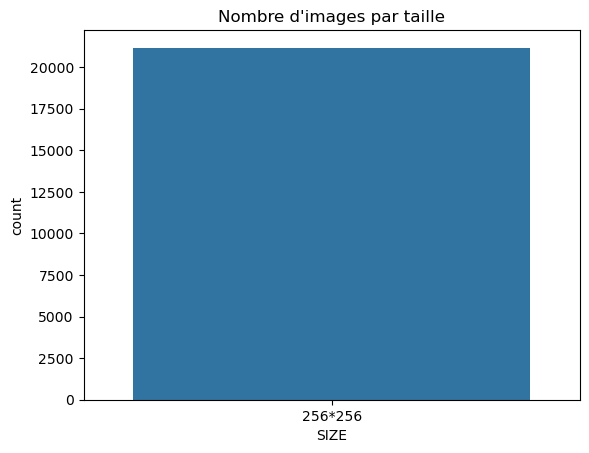

In [13]:
# Graph nombre d'images par taille

sns.countplot(x = "SIZE", data = df)
plt.title("Nombre d'images par taille")

ANALYSE : THEORIQUEMENT, toutes les images du jeu de données ont la même taille.

### Etude de la répartition des images par JDD

In [14]:
# Pour ordonner les jdd entre eux on crée une variable index_jdd

df["jdd_index"] = df["jdd"].replace(["Normal", "Lung_Opacity", "Viral Pneumonia", "COVID"], [0,1,2,3])


Text(0, 0.5, "Nombre d'images")

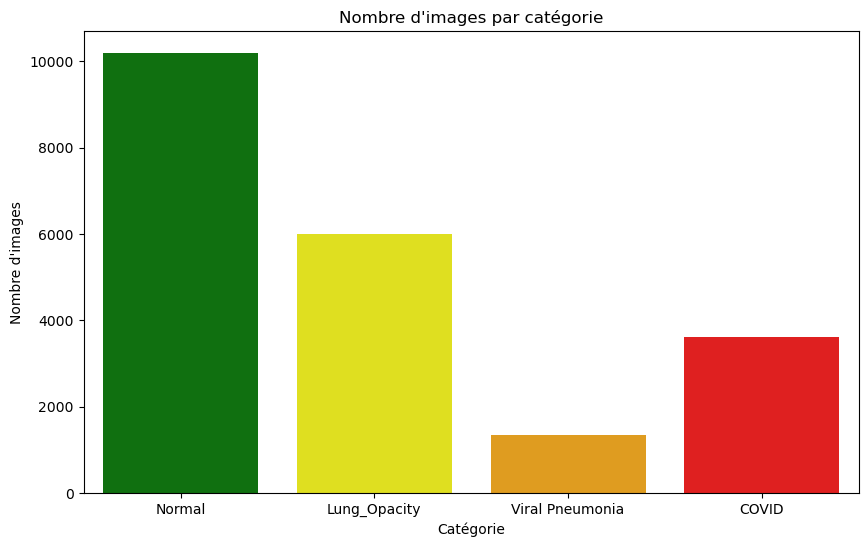

In [98]:
# Graphique du nombre d'image par jdd

colors = ["green", "yellow", "orange", "red"] # On essaiera de garder ce code couleur par la suite

plt.figure(figsize = (10,6))
g = sns.countplot(x = "jdd", data = df, palette = colors)
plt.title("Nombre d'images par catégorie")
g.set_xlabel("Catégorie")
g.set_ylabel("Nombre d'images")

### Etude de la répartition des images par source

In [16]:
# Pour simplifier la lecture on crée une variable simplifiée de désignation de la source

urls = list(df["URL"].unique())
noms_simplifies = ["KGL_RSNA_Pneumonia", "KGL_Chest_Xray_Pneumonia", "SIRM_Covid", "GitHub_covid_repo", "Eurorad", "GitHub_covid_CXNet", "GitHub_covid_chestray_ds", "Bimcv_covid19"]

# Création nouvelle variables avec noms simplifiés
df["source"] = df["URL"].replace(urls, noms_simplifies)
df.head()

,FILE NAME,FORMAT,SIZE,URL,jdd,jdd_index,source
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia


<function matplotlib.pyplot.legend(*args, **kwargs)>

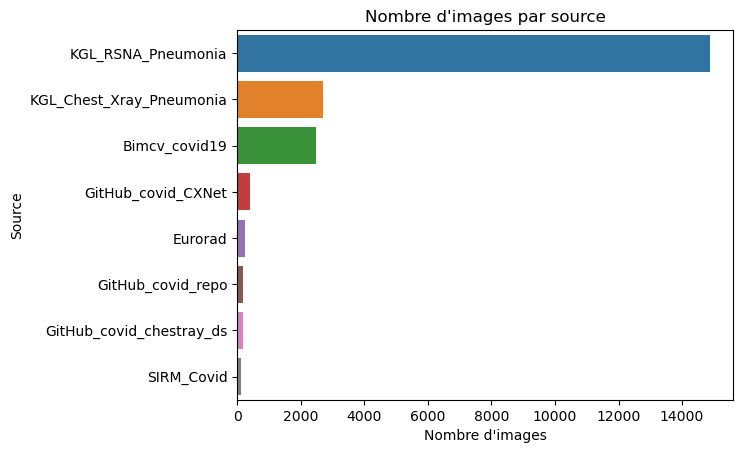

In [94]:
# Graphique du nombre d'images par source


g = sns.countplot(y = "source", data = df, order = df["source"].value_counts().index)
plt.title("Nombre d'images par source", size = 12)
g.set_xlabel("Nombre d'images")
g.set_ylabel("Source")
plt.legend

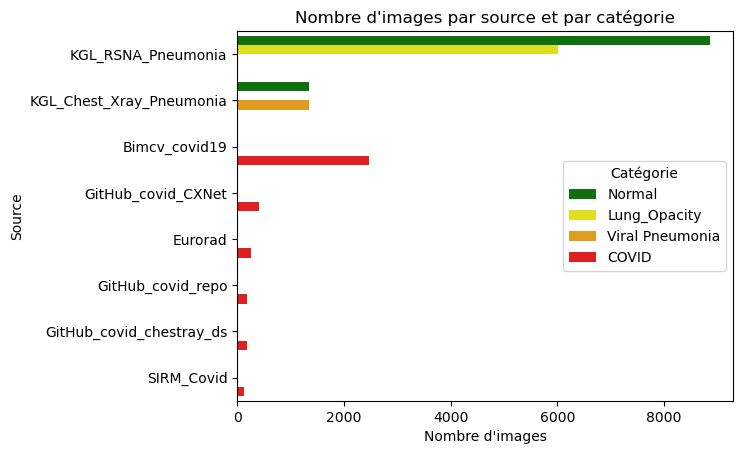

In [92]:
# Graphique du nombre d'images par source et par jdd

g = sns.countplot(y = "source", data = df, hue = "jdd", palette = colors, order = df["source"].value_counts().index)
plt.title("Nombre d'images par source et par catégorie", size = 12)
g.set_xlabel("Nombre d'images")
g.set_ylabel("Source")
plt.legend(title = "Catégorie", loc = "center right")

In [20]:
## Intégration Variable présence Covid
df["presence_Covid"] = df["jdd"].apply(lambda x: x == "COVID")

# Exploration du jeu de données images

## Pointage vers l'emplacement des images et affichage

In [21]:
# On crée une nouvelle variable avec 'emplacement de l'image (construit via nom jdd, nom fichier et format)

df["path"] = "." +"/" + df["jdd"] + "/" + "images" + "/" + df["FILE NAME"].str.capitalize()+ "." + df["FORMAT"].str.lower()
df = df.reset_index()
df.head()

,index,FILE NAME,FORMAT,SIZE,URL,jdd,jdd_index,source,presence_Covid,path
0,0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-1.png
1,1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-2.png
2,2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-3.png
3,3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-4.png
4,4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-5.png


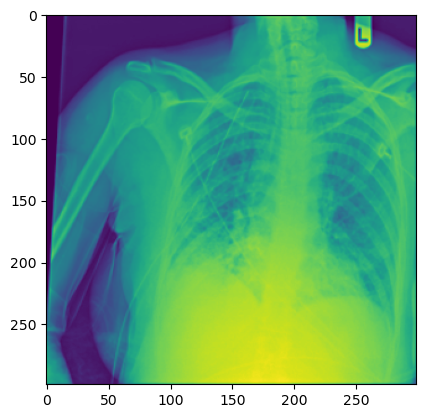

In [22]:
# Tentons d'afficher une image

image_test = plt.imread(df.loc[12309,"path"])
plt.imshow(image_test)

In [23]:
print('Image Shape: {}'.format(image_test.shape))
print('Image Height: {}'.format(image_test.shape[0]))
print('Image Width: {}'.format(image_test.shape[1]))
print('Image Dimension: {}'.format(image_test.ndim))
print('Image Size: {}kb'.format(image_test.size//1024))
print('Image Data Type: {}'.format(image_test.dtype))
print('Maximum RGB value of the image: {}'.format(image_test.max()))
print('Minimum RGB value of the image: {}'.format(image_test.min()))

Image Shape: (299, 299)
Image Height: 299
Image Width: 299
Image Dimension: 2
Image Size: 87kb
Image Data Type: float32
Maximum RGB value of the image: 0.9686274528503418
Minimum RGB value of the image: 0.0


## Stockage des images sous forme d'array

In [24]:
# Création d'un colonne pour stocker les images sous forme d'array

from PIL import Image
import numpy as np
 
#On convertit toutes les images en 75 x 75 et en niveau de gris pour obtenir une matrice de dim 75 x 75 x 1
df["image"] = df["path"].map(lambda x: np.asarray(Image.open(x).convert("L").resize((75,75))))

#En effet on avait détecté 140 images en RGB

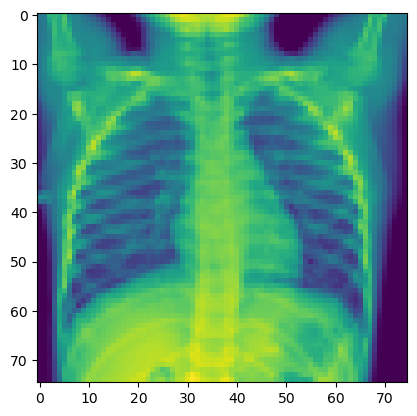

In [25]:
#On teste

img = Image.fromarray(df.loc[1326,"image"])
plt.imshow(img)

## Statistiques sur les images

### Mesures d'intensités

In [26]:
#Calcul et stockage de différentes mesures sur les images

im_mean = []
im_std = []
im_max = []
im_min = []

for i in range(0, len(df)):
    im_mean.append(np.mean(df["image"][i]))
    im_std.append(np.std(df["image"][i]))
    im_max.append(np.max(df["image"][i]))
    im_min.append(np.min(df["image"][i]))
    
df["im_mean"] = im_mean
df["im_std"] = im_std
df["im_max"] = im_max
df["im_min"] = im_min
df.head()

,index,FILE NAME,FORMAT,SIZE,URL,jdd,jdd_index,source,presence_Covid,path,image,im_mean,im_std,im_max,im_min
0,0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-1.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",85.345778,70.237824,-17,0
1,1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-2.png,"[[60, 40, 20, 19, 19, 19, 18, 18, 17, 17, 17, ...",154.808533,65.684935,-17,5
2,2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-3.png,"[[124, 55, 16, 7, 8, 8, 8, 8, 7, 6, 7, 7, 7, 8...",155.032711,51.044009,-31,0
3,3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-4.png,"[[7, 6, 5, 4, 2, 0, 0, 2, 6, 15, 18, 23, 31, 4...",138.449067,65.055955,-6,0
4,4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-5.png,"[[1, 2, 2, 4, 5, 7, 11, 15, 18, 20, 23, 24, 27...",135.675733,54.169634,-6,1


In [27]:
# Apercu des différentes variables créées

df.describe()

,index,jdd_index,im_mean,im_std,im_max,im_min
count,21165.000000,21165.000000,21165.000000,21165.000000,21165.000000,21165.000000
mean,3658.972927,0.923695,129.931615,58.591817,-24.356390,2.119112
std,2736.388826,1.105769,23.509027,11.092750,21.851372,7.374159
min,0.000000,0.000000,25.586489,13.877663,-125.000000,0.000000
25%,1322.000000,0.000000,113.340622,51.222849,-35.000000,0.000000
50%,3079.000000,1.000000,127.147911,59.643776,-16.000000,0.000000
75%,5456.000000,1.000000,146.735467,66.735864,-9.000000,0.000000
max,10191.000000,3.000000,229.414400,106.490735,124.000000,117.000000


### Graphs

Text(0.5, 1.0, 'Distribution des moyennes de luminosité en fonction des sources')

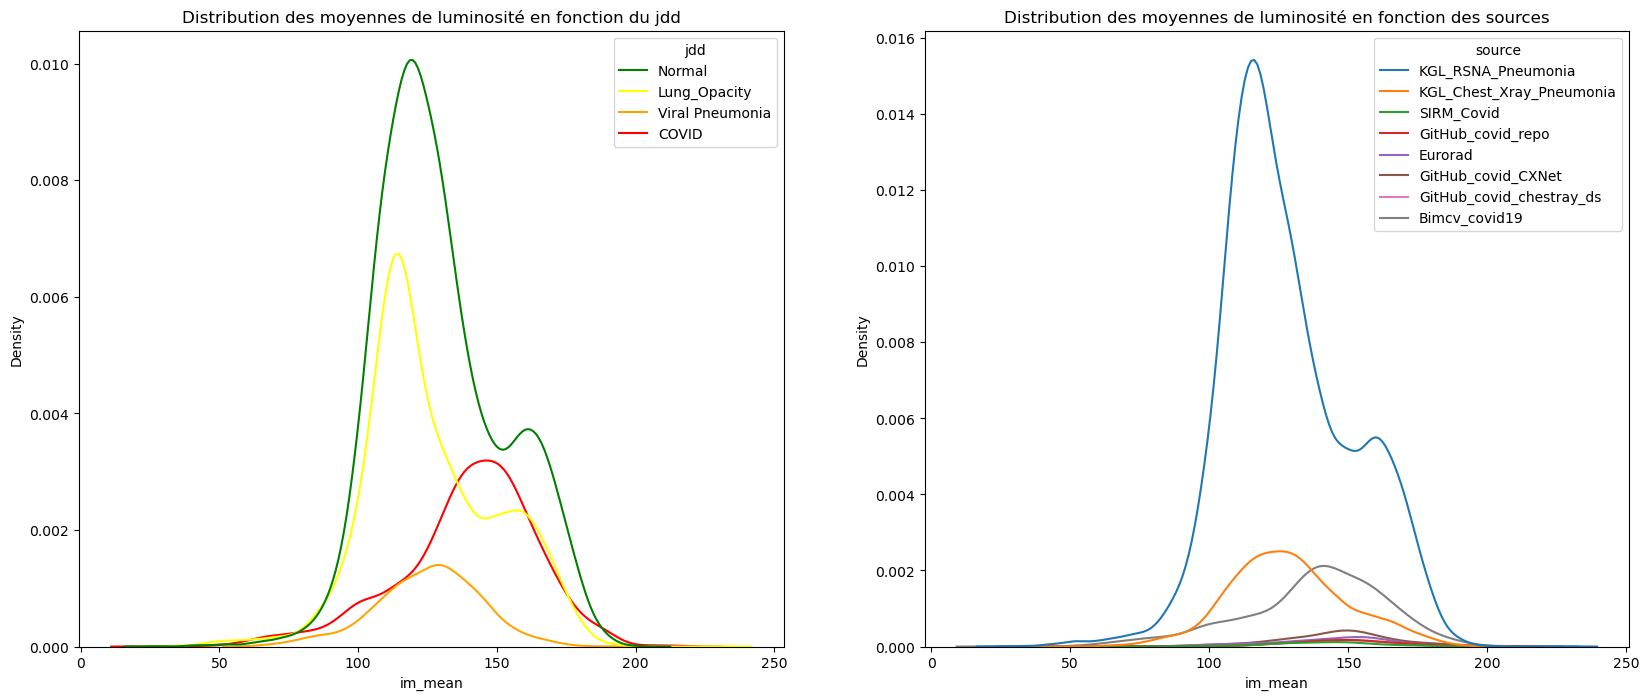

In [28]:
# Moyennes

plt.figure(figsize = (20,8))
plt.subplot(121)
sns.kdeplot(x = "im_mean", data = df, hue = "jdd", palette = colors)
plt.title("Distribution des moyennes de luminosité en fonction du jdd")
plt.subplot(122)
sns.kdeplot(x = "im_mean", data = df, hue = "source")
plt.title("Distribution des moyennes de luminosité en fonction des sources")

Text(0.5, 1.0, 'Distribution des écarts-types de luminosité en fonction des sources')

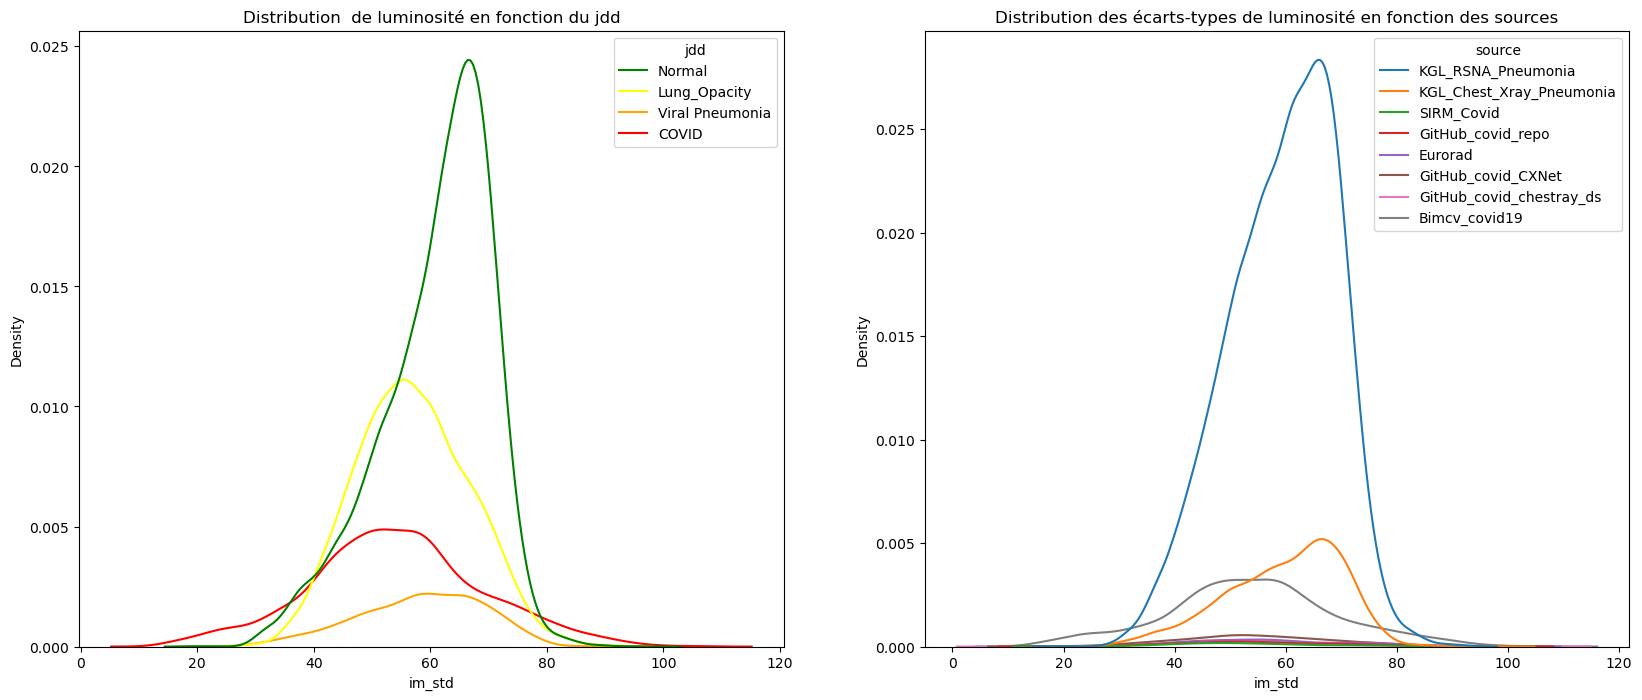

In [29]:
# Ecarts-types

plt.figure(figsize = (20,8))
plt.subplot(121)
sns.kdeplot(x = "im_std", data = df, hue = "jdd", palette = colors)
plt.title("Distribution  de luminosité en fonction du jdd")
plt.subplot(122)
sns.kdeplot(x = "im_std", data = df, hue = "source")
plt.title("Distribution des écarts-types de luminosité en fonction des sources")

Text(0.5, 1.0, 'Distribution du maximum de luminosité en fonction des sources')

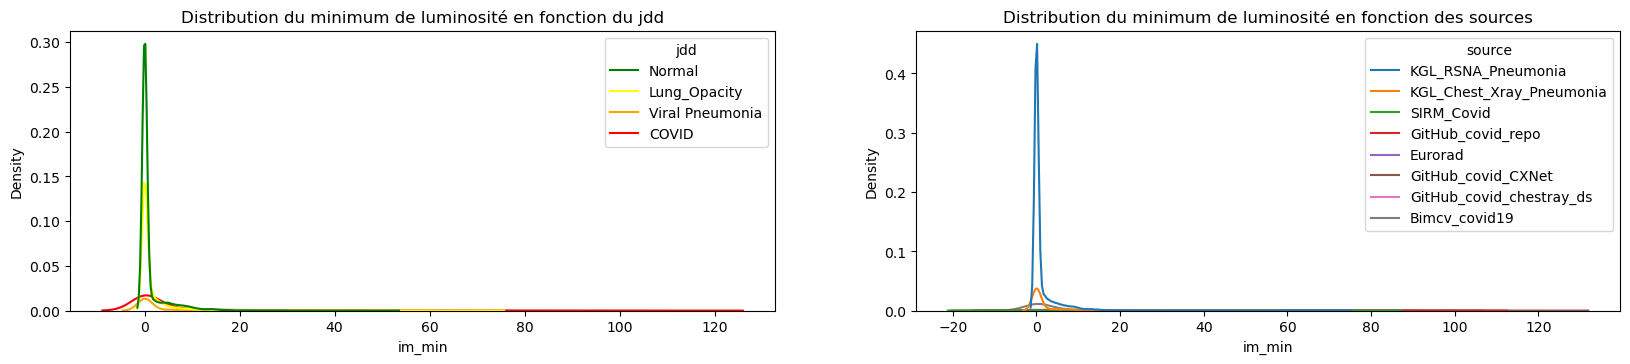

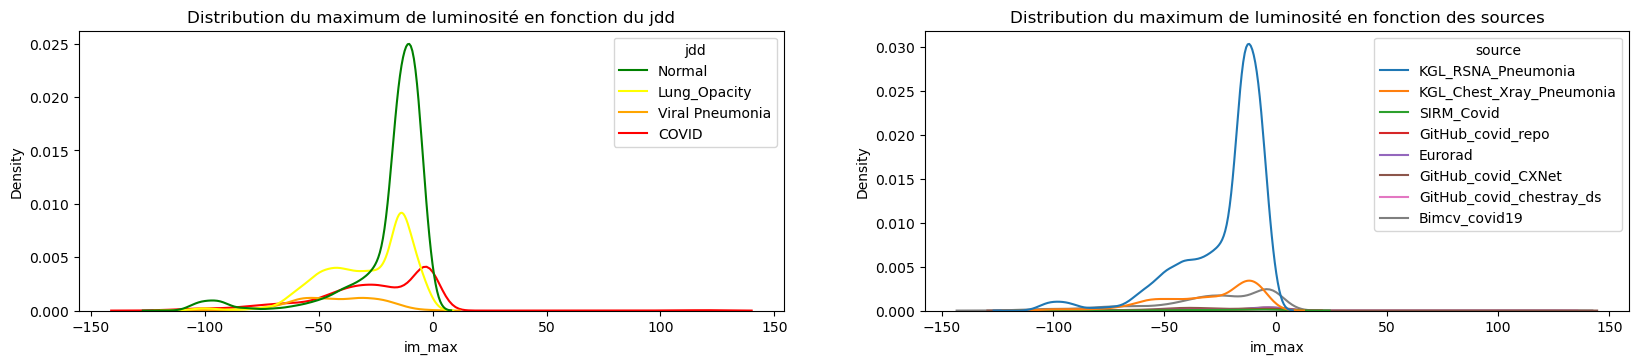

In [30]:
# Min et Max

plt.figure(figsize = (20,8))
plt.subplot(221)
sns.kdeplot(x = "im_min", data = df, hue = "jdd", palette = colors)
plt.title("Distribution du minimum de luminosité en fonction du jdd")
plt.subplot(222)
sns.kdeplot(x = "im_min", data = df, hue = "source")
plt.title("Distribution du minimum de luminosité en fonction des sources")

#Rien d'intéressant tout est à 0

plt.figure(figsize = (20,8))
plt.subplot(223)
sns.kdeplot(x = "im_max", data = df, hue = "jdd", palette = colors)
plt.title("Distribution du maximum de luminosité en fonction du jdd")
plt.subplot(224)
sns.kdeplot(x = "im_max", data = df, hue = "source")
plt.title("Distribution du maximum de luminosité en fonction des sources")

#C'est bizarre les maximum sont négatifs

## Intégration des masques

Nous allons essayer d'intégrer les masques pour laisser de côté toutes informations externes aux poumons qui ne nous interessent pas et pevent fausser / créer des biais d'interprétation.

### Lien vers les emplacements des masques

In [36]:
#On stocke l'emplacement de chaque masque dans le dataframe

df["mk_path"] = "." +"/" + df["jdd"] + "/" + "masks" + "/" + df["FILE NAME"].str.capitalize()+ "." + df["FORMAT"].str.lower()
df.head()

,index,FILE NAME,FORMAT,SIZE,URL,jdd,jdd_index,source,presence_Covid,path,image,im_mean,im_std,im_max,im_min,mk_path
0,0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-1.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",85.345778,70.237824,-17,0,./Normal/masks/Normal-1.png
1,1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-2.png,"[[60, 40, 20, 19, 19, 19, 18, 18, 17, 17, 17, ...",154.808533,65.684935,-17,5,./Normal/masks/Normal-2.png
2,2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-3.png,"[[124, 55, 16, 7, 8, 8, 8, 8, 7, 6, 7, 7, 7, 8...",155.032711,51.044009,-31,0,./Normal/masks/Normal-3.png
3,3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-4.png,"[[7, 6, 5, 4, 2, 0, 0, 2, 6, 15, 18, 23, 31, 4...",138.449067,65.055955,-6,0,./Normal/masks/Normal-4.png
4,4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-5.png,"[[1, 2, 2, 4, 5, 7, 11, 15, 18, 20, 23, 24, 27...",135.675733,54.169634,-6,1,./Normal/masks/Normal-5.png


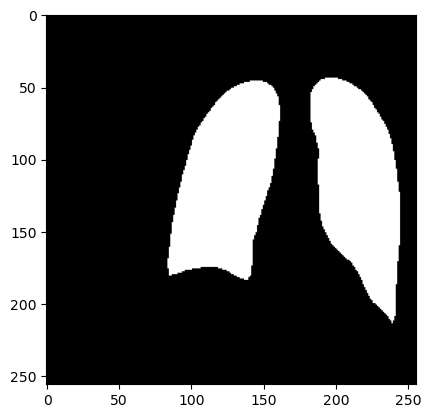

In [37]:
# On tente d'afficher un masque

mask_test = plt.imread(df.loc[12309,"mk_path"])
plt.imshow(mask_test)

In [38]:
print('Image Shape: {}'.format(mask_test.shape))
print('Image Height: {}'.format(mask_test.shape[0]))
print('Image Width: {}'.format(mask_test.shape[1]))
print('Image Dimension: {}'.format(mask_test.ndim))
print('Image Size: {}kb'.format(mask_test.size//1024))
print('Image Data Type: {}'.format(image_test.dtype))
print('Maximum RGB value of the image: {}'.format(mask_test.max()))
print('Minimum RGB value of the image: {}'.format(mask_test.min()))

Image Shape: (256, 256, 3)
Image Height: 256
Image Width: 256
Image Dimension: 3
Image Size: 192kb
Image Data Type: float32
Maximum RGB value of the image: 1.0
Minimum RGB value of the image: 0.0


## Stockage des masks sous forme d'array

In [39]:
# Création d'un colonne pour stocker les masques sous forme d'array 75x75x1, à la même dim que les images (en niveau de gris)

df["mask"] = df["mk_path"].map(lambda x: np.asarray(Image.open(x).convert('L').resize((75,75))))

In [40]:
df.head()

,index,FILE NAME,FORMAT,SIZE,URL,jdd,jdd_index,source,presence_Covid,path,image,im_mean,im_std,im_max,im_min,mk_path,mask
0,0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-1.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",85.345778,70.237824,-17,0,./Normal/masks/Normal-1.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-2.png,"[[60, 40, 20, 19, 19, 19, 18, 18, 17, 17, 17, ...",154.808533,65.684935,-17,5,./Normal/masks/Normal-2.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-3.png,"[[124, 55, 16, 7, 8, 8, 8, 8, 7, 6, 7, 7, 7, 8...",155.032711,51.044009,-31,0,./Normal/masks/Normal-3.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-4.png,"[[7, 6, 5, 4, 2, 0, 0, 2, 6, 15, 18, 23, 31, 4...",138.449067,65.055955,-6,0,./Normal/masks/Normal-4.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-5.png,"[[1, 2, 2, 4, 5, 7, 11, 15, 18, 20, 23, 24, 27...",135.675733,54.169634,-6,1,./Normal/masks/Normal-5.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


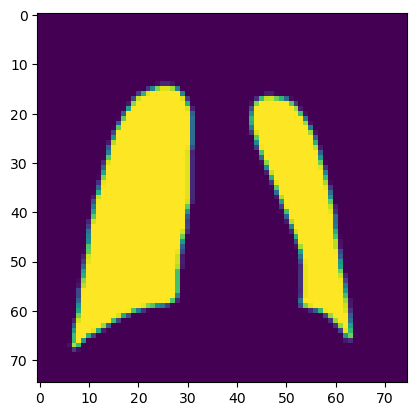

In [41]:
img = Image.fromarray(df.loc[16543,"mask"])
plt.imshow(img)

## Stockage des images filtrées par les masques

In [42]:
#On définit une fonction de concaténation d'une image et d'un masque

def concatImMk (image, mask) :
    if (image.shape == mask.shape) : # S'ils ont les mêmes dimensions
        concat_im_mk = np.zeros(image.shape)
        for i in range(0, image.shape[0]) :
            for j in range(0, image.shape[1]) :
                if (mask[i,j] !=0) :
                    concat_im_mk[i,j] = image[i,j]
        return concat_im_mk

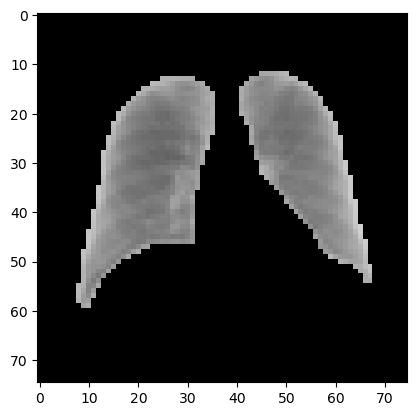

In [43]:
# On teste ! OMG OMG OMG

im_mk_test = concatImMk(df.loc[2,"image"], df.loc[2,"mask"])

img = Image.fromarray(im_mk_test)
plt.imshow(img)

In [44]:
# On applique à toutes les images

im_mkd = []

for i in range(0, len(df)):
    im_mkd.append(concatImMk(df.loc[i,"image"], df.loc[i,"mask"]))
    
df["im_mkd"] = im_mkd

## Mesures sur les images filtrées

In [45]:
#Calcul et stockage de différentes mesures sur les images

im_mk_mean = []
im_mk_std = []
im_mk_max = []
im_mk_min = []

for i in range(0, len(df)):
    im_mk_mean.append(np.mean(df["im_mkd"][i]))
    im_mk_std.append(np.std(df["im_mkd"][i]))
    im_mk_max.append(np.max(df["im_mkd"][i]))
    im_mk_min.append(np.min(df["im_mkd"][i]))
    
df["im_mkd_mean"] = im_mk_mean
df["im_mkd_std"] = im_mk_std
df["im_mkd_max"] = im_mk_max
df["im_mkd_min"] = im_mk_min

In [46]:
df.head()

,index,FILE NAME,FORMAT,SIZE,URL,jdd,jdd_index,source,presence_Covid,path,...,im_std,im_max,im_min,mk_path,mask,im_mkd,im_mkd_mean,im_mkd_std,im_mkd_max,im_mkd_min
0,0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-1.png,...,70.237824,-17,0,./Normal/masks/Normal-1.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",28.447467,50.178467,205.0,0.0
1,1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-2.png,...,65.684935,-17,5,./Normal/masks/Normal-2.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",37.480533,65.174558,231.0,0.0
2,2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-3.png,...,51.044009,-31,0,./Normal/masks/Normal-3.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",33.265956,60.967261,209.0,0.0
3,3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-4.png,...,65.055955,-6,0,./Normal/masks/Normal-4.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",36.689956,53.623115,224.0,0.0
4,4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...,Normal,0,KGL_RSNA_Pneumonia,False,./Normal/images/Normal-5.png,...,54.169634,-6,1,./Normal/masks/Normal-5.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",27.248533,45.077664,188.0,0.0


## Graphiques sur les images filtrées

Text(0.5, 1.0, 'Distribution des moyennes de luminosité en fonction des sources après masque')

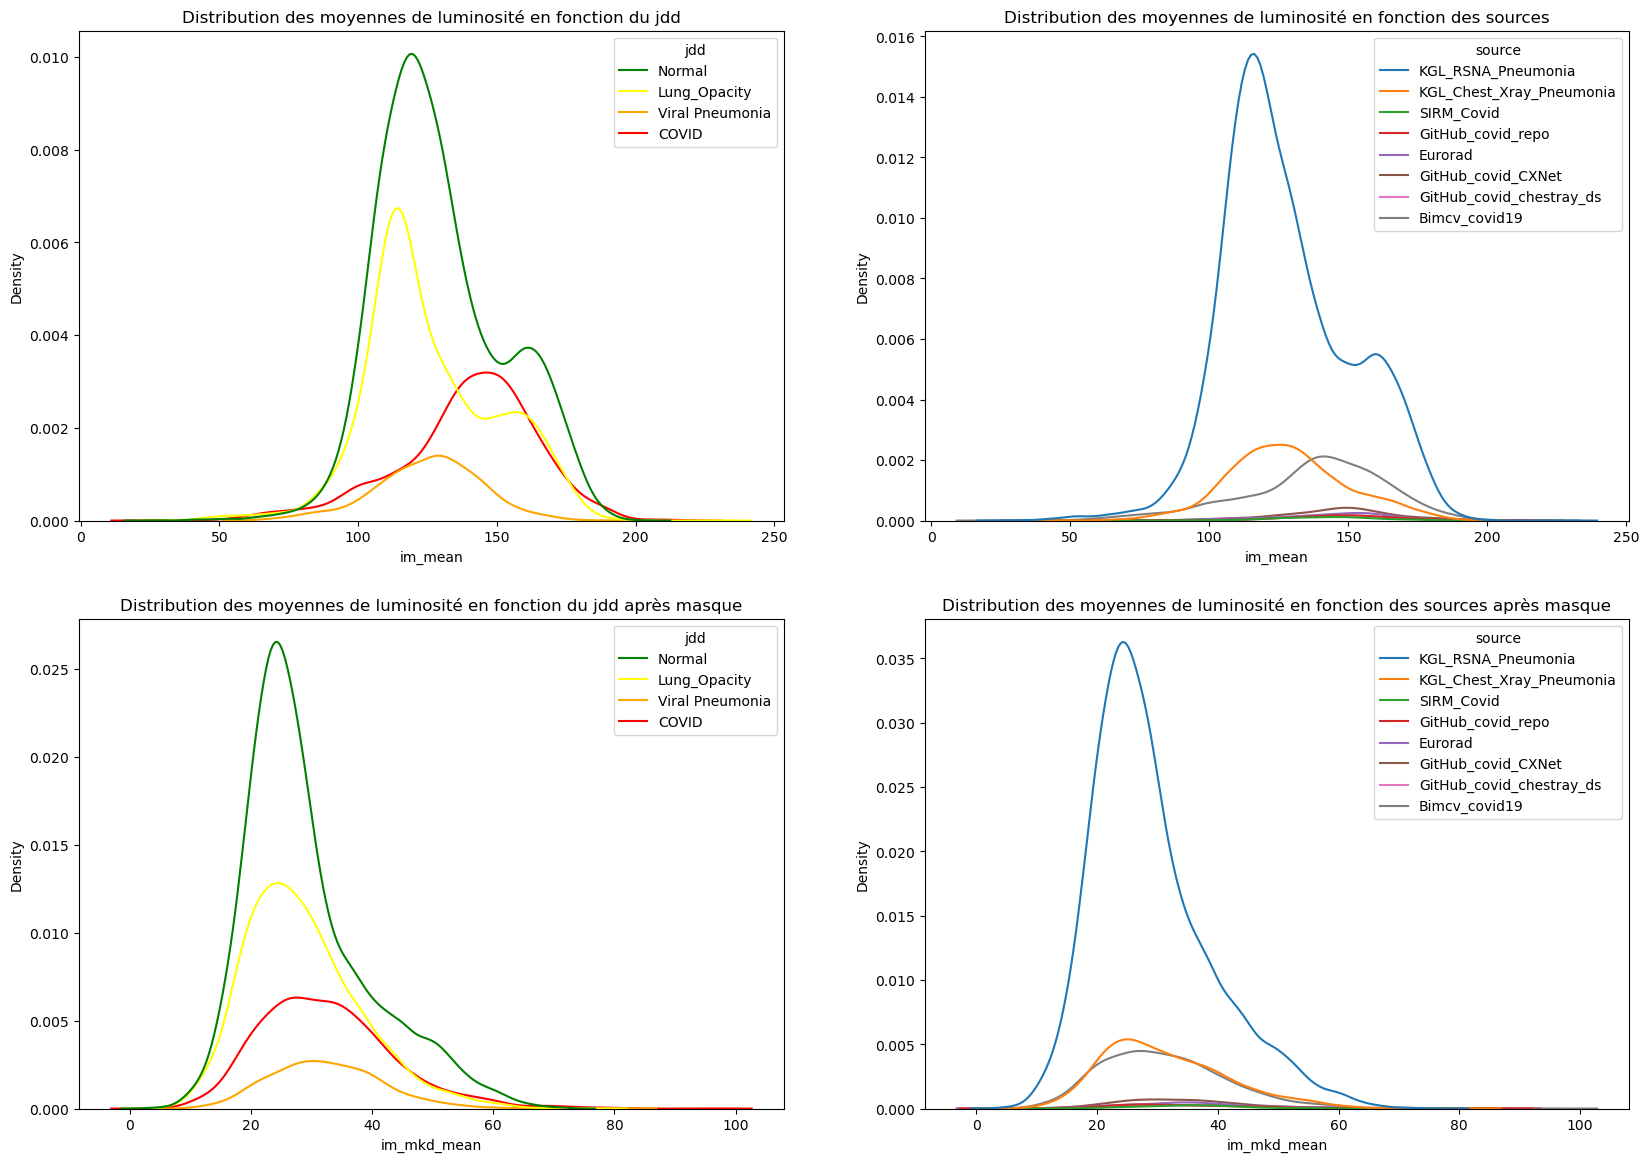

In [47]:
# Moyennes

plt.figure(figsize = (20,14))
plt.subplot(221)
sns.kdeplot(x = "im_mean", data = df, hue = "jdd", palette = colors)
plt.title("Distribution des moyennes de luminosité en fonction du jdd")
plt.subplot(222)
sns.kdeplot(x = "im_mean", data = df, hue = "source")
plt.title("Distribution des moyennes de luminosité en fonction des sources")

plt.subplot(223)
sns.kdeplot(x = "im_mkd_mean", data = df, hue = "jdd", palette = colors)
plt.title("Distribution des moyennes de luminosité en fonction du jdd après masque")
plt.subplot(224)
sns.kdeplot(x = "im_mkd_mean", data = df, hue = "source")
plt.title("Distribution des moyennes de luminosité en fonction des sources après masque")


On constate que les zones hors poumons, liées au cadrage ou reste du corps avaient un fort impact sur
la distribution des intensités moyennes du dataset

Text(0.5, 1.0, 'Distribution des moyennes de luminosité en fonction présence covid')

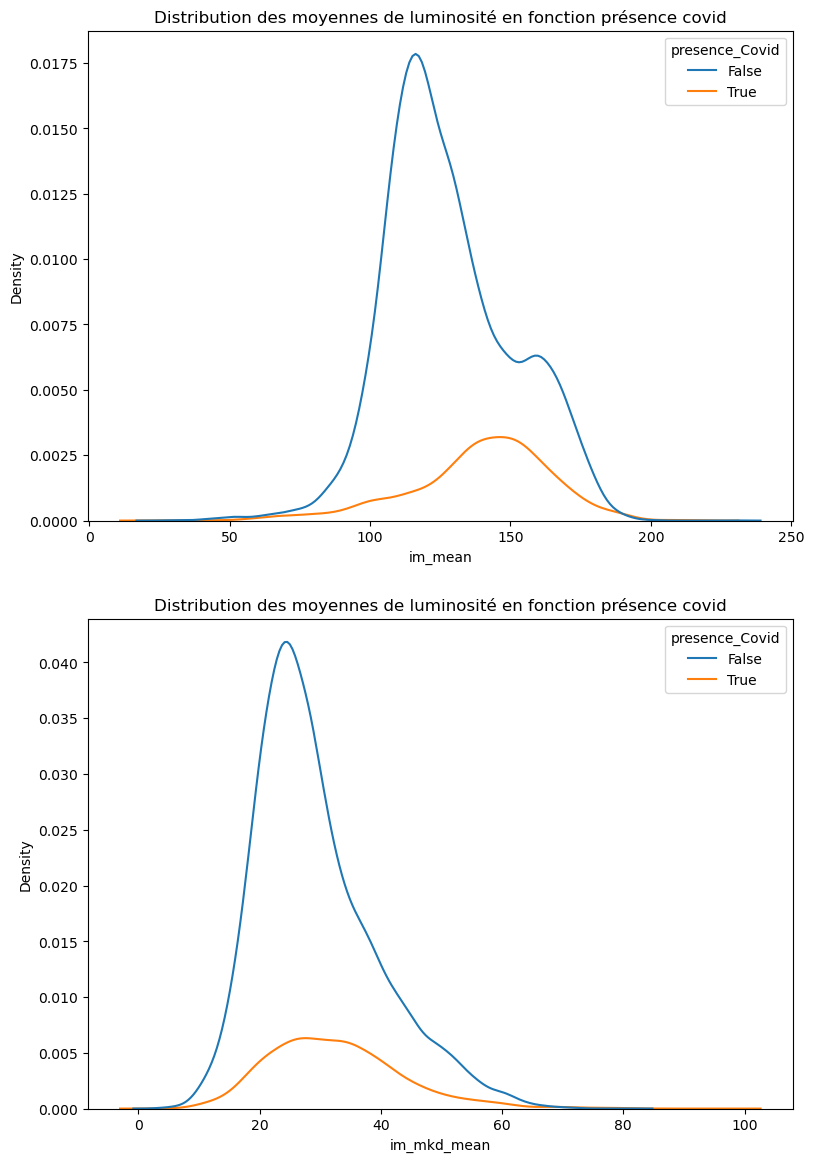

In [55]:
# Moyennes

plt.figure(figsize = (20,14))
plt.subplot(221)
sns.kdeplot(x = "im_mean", data = df, hue = "presence_Covid")
plt.title("Distribution des moyennes de luminosité en fonction présence covid")

plt.subplot(223)
sns.kdeplot(x = "im_mkd_mean", data = df, hue = "presence_Covid")
plt.title("Distribution des moyennes de luminosité en fonction présence covid")